## Alumno : Rubén Álvarez Mosquera

---

# **Estudio sobre la predicción de la calidad de vinos**

*Prfacio : La tarea consiste en hacer un estudio sobre la calidad de los vinos, y poder hacer un modelo de regresión.*

---



## Declaración de módulos

---

En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib traza las figuras correctamente y preparar una función para guardar las figuras. También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [1]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import os;

import pandas as pd

# la línea que sigue, sólo en Colab ...
# %matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);

# Importamos librería "Seaborn" para la visualización que es como un MatPlotLib con "esteriodes"
import seaborn as sns 


# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings

Configuración de Advertencias "Futurewarning"

In [2]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)

Configuración de las visualizaciones de Seaborn

In [3]:
# Configuramos visualizaciones con Seaborn
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Importando los datos

---

In [4]:
WINE_PATH = os.path.join("datasets", "winequality");

def load_wine_data(wine_path):
    csv_path = os.path.join(wine_path, "winequality.csv")
    print("Leyendo", csv_path)
    return pd.read_csv(csv_path)

Importamos el Dataframe a una variable

In [5]:
rwine = load_wine_data(WINE_PATH)

Leyendo datasets\winequality\winequality.csv


Comprobamos le información del dataset con una muestra

In [6]:
rwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Comprobamos cierta información sobre el dataset

In [7]:
rwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Realizamos un resumen y descripción del Dataset de forma general

In [8]:
rwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Revisamos el estado de los datos, con los histogramas
---

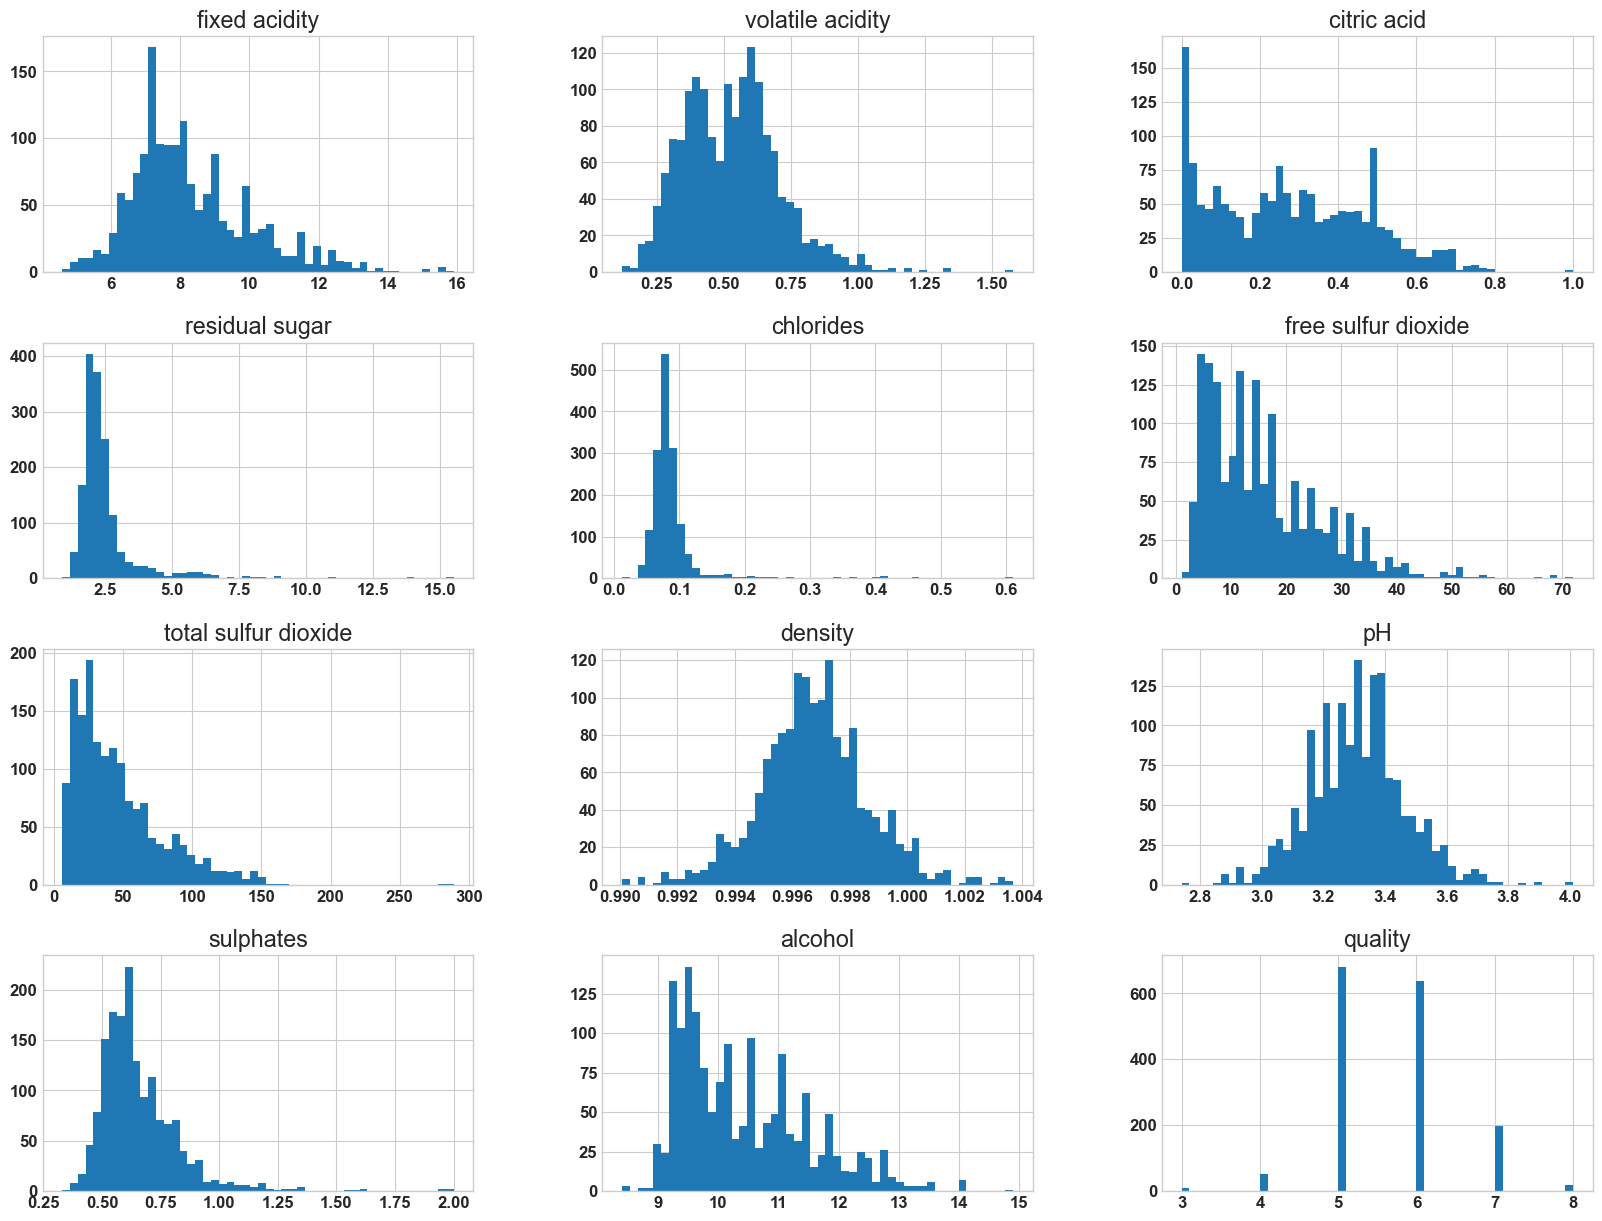

In [9]:
rwine.hist(bins=50, figsize =(20,15))
plt.show()

### Podemos observar que:
- La mayoría de las variables del dataset tienen una distribución normal (Gauss), por lo que nos facilita su estudio con el índice de Pearson, que únicamente funciona cuando las variables son de distribución normal


### Comprobamos el número de NaN por categoría

In [10]:
rwine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Vemos que no hay que realizar ningún ajuste en los NaN


### Comprobamos la distribución de la catalogación de "Calidad"

In [11]:
rwine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Vemos que su distribución de de tipo normal, con una moda de '5'

# Descubrir y visualizar los datos para obtener información

---



## Buscando correlaciones

In [12]:
corr_matrix = rwine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [13]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

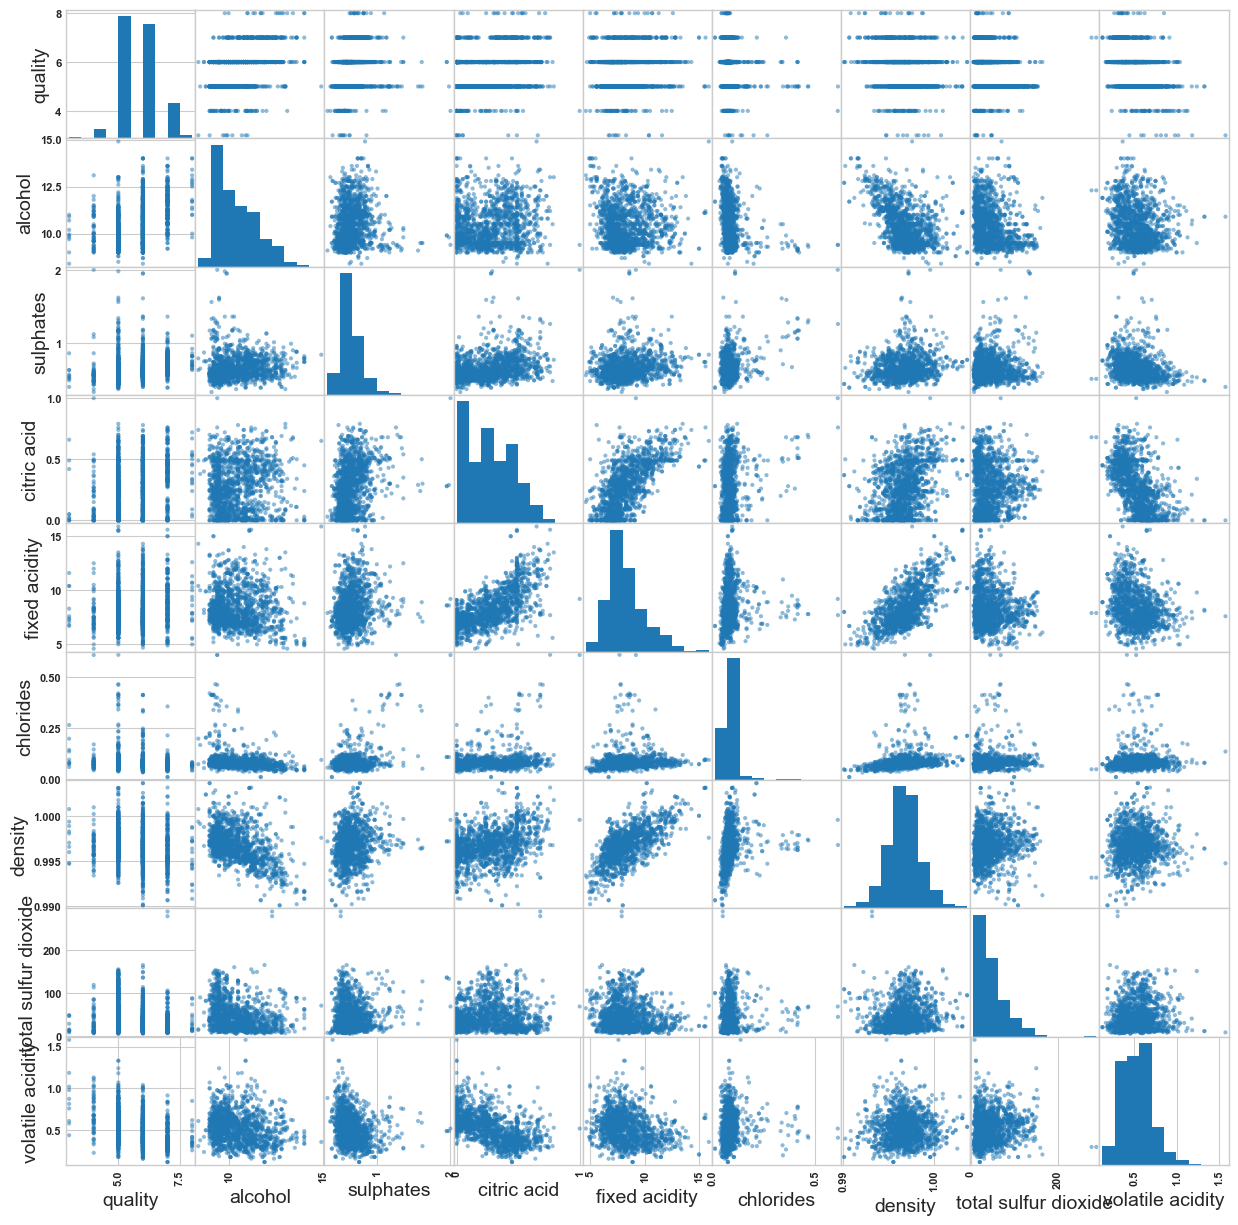

In [14]:
from pandas.plotting import scatter_matrix;

attributes = ["quality", "alcohol", "sulphates", "citric acid", 
                "fixed acidity","chlorides", "density", 
                "total sulfur dioxide", "volatile acidity"]


scatter_matrix(rwine[attributes], figsize=(15,15) );

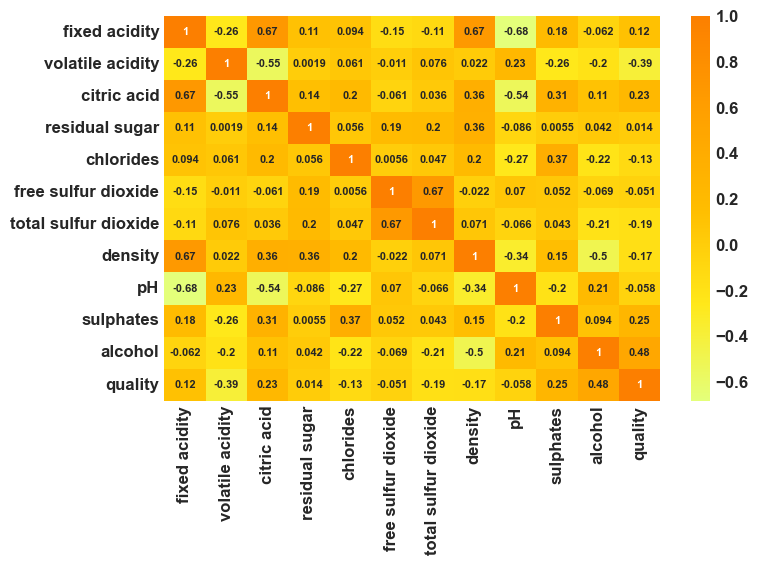

In [15]:
corr_norm = rwine.corr()
# Reduciremos el tamaño de fuente para este gráfico (y lo volveremos a dejar como estaba) por el tamaño de celdas
plt.rcParams['font.size'] =8
sns.heatmap(corr_norm, cmap = 'Wistia', annot= True)
plt.rcParams['font.size'] =14

## Observamos las siguientes Conclusiones preliminares:
- Existe una correlación positiva entre Calidad y Alcohol, del 0.48
- También destacar que existe una correlación negativa entre Calidad y la acidez volátil que el vino desprende, del -0.39
- Existe una correlación positiva entre Calidad y Sulfitos, del 0.25 y también entre Calidad y Acido Citrico, del 0.23
- A parte de la calidad, existe una correlacion positiva importante entre Desidad y Acidos fijos del 0.67
- De la misma manera existe una correlación positiva fuerte entre Acidos Fijos y ácido Citrico del 0.67
- Destacar unas correlaciones positivas debiles entre la Densidad y los Azúcares residuales y ácido cítrico del 0.36 
- También encontramos correlación positiva de 0.37 entre los Sulfitos y los Cloritos
- Dentro de las correlaciones negativas, podemos destacar la existente entre:
  - PH y Acidez Fija del -0.68
  - PH y Ácido cítrico del -0.54
  - PH y Densidad del -0.34
  - Alcohol y Densidad del -0.5
  - Volatitidad de la Acidez y el Ácido Cítrico del -0.55

---

 ## Observamos las relaciones entre Calidad y las diferentes variable.

### "Fixed Acidity VS Quality"

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

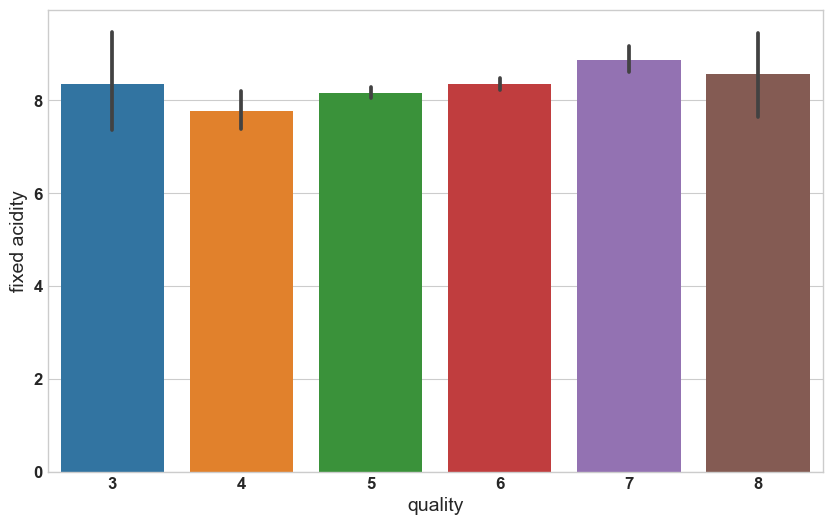

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = rwine)

In [25]:
print('Correlación de Pearson: ', rwine['quality'].corr(rwine['fixed acidity'], method='pearson'))
print('Correlación de Spearman: ', rwine['quality'].corr(rwine['fixed acidity'], method='spearman'))
print('Correlación de Kendall: ', rwine['quality'].corr(rwine['fixed acidity'], method='kendall'))

Correlación de Pearson:  0.12405164911322432
Correlación de Spearman:  0.11408367358880324
Correlación de Kendall:  0.08796608678616907


### CONCLUSIONES:
  - No vemos una relación 

---

### "Citric Acid VS Quality"

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

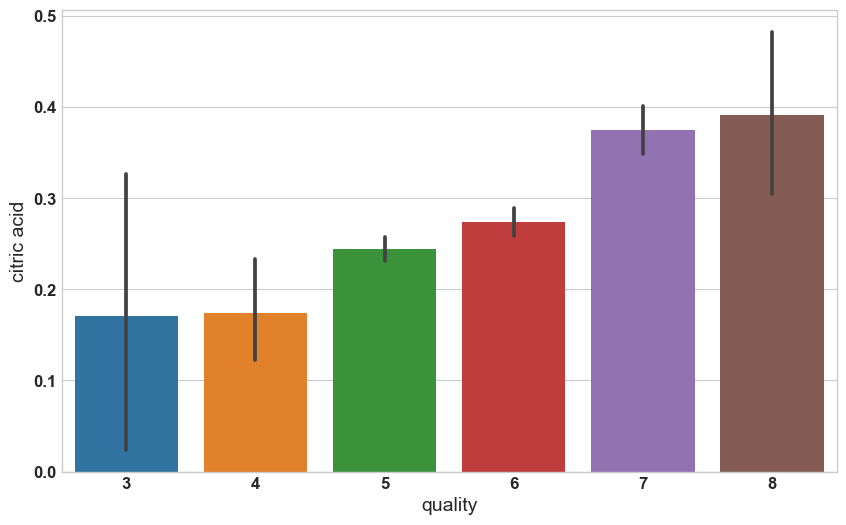

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = rwine)

In [26]:
print('Correlación de Pearson: ', rwine['quality'].corr(rwine['citric acid'], method='pearson'))
print('Correlación de Spearman: ', rwine['quality'].corr(rwine['citric acid'], method='spearman'))
print('Correlación de Kendall: ', rwine['quality'].corr(rwine['citric acid'], method='kendall'))

Correlación de Pearson:  0.2263725143180413
Correlación de Spearman:  0.2134809144221363
Correlación de Kendall:  0.1673179295071883


### CONCLUSIONES:
  - No vemos una relación débil

---

### "Sulphates VS Quality"

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

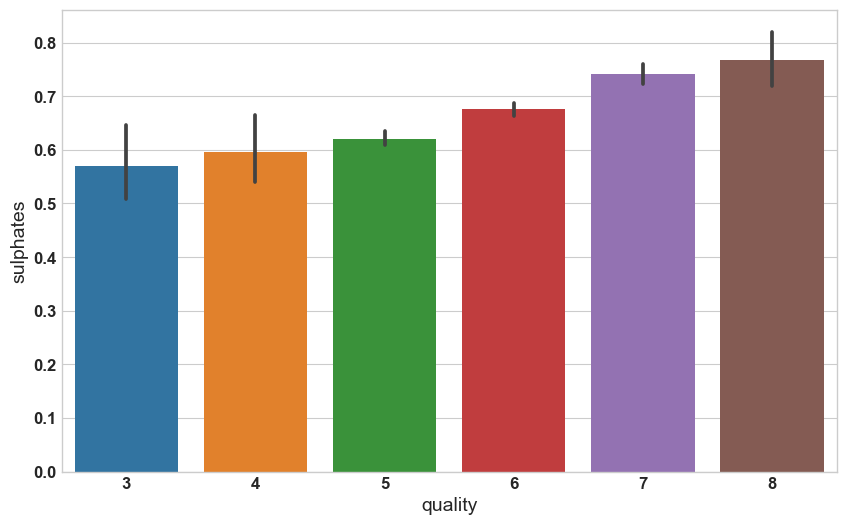

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = rwine)

In [28]:
print('Correlación de Pearson: ', rwine['quality'].corr(rwine['sulphates'], method='pearson'))
print('Correlación de Spearman: ', rwine['quality'].corr(rwine['sulphates'], method='spearman'))
print('Correlación de Kendall: ', rwine['quality'].corr(rwine['sulphates'], method='kendall'))

Correlación de Pearson:  0.25139707906926134
Correlación de Spearman:  0.37706019910212196
Correlación de Kendall:  0.29926961934658824


### CONCLUSIONES:
  - No vemos una relación mayor respecto al nivel de ácido cítrico, pero aún es débil

---

### "Alcohol VS Quality"

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

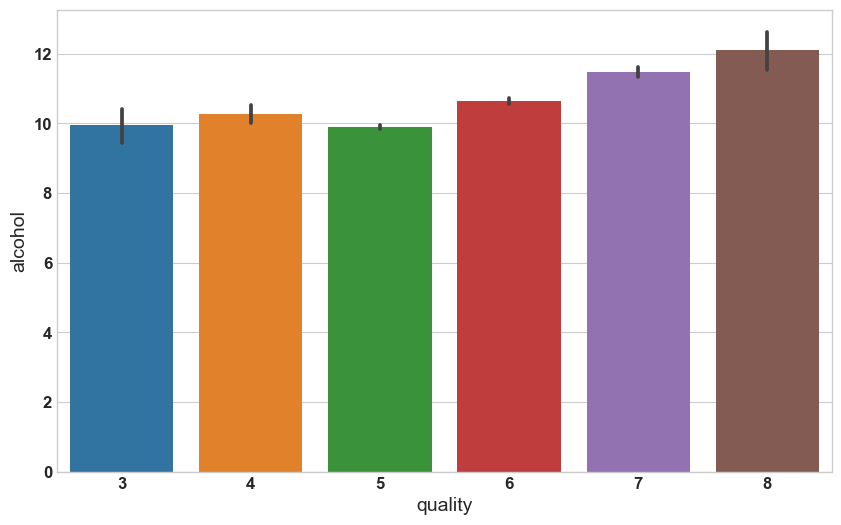

In [33]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = rwine)

In [31]:
print('Correlación de Pearson: ', rwine['quality'].corr(rwine['alcohol'], method='pearson'))
print('Correlación de Spearman: ', rwine['quality'].corr(rwine['alcohol'], method='spearman'))
print('Correlación de Kendall: ', rwine['quality'].corr(rwine['alcohol'], method='kendall'))

Correlación de Pearson:  0.4761663240011359
Correlación de Spearman:  0.4785316874702435
Correlación de Kendall:  0.3803673050777581


### CONCLUSIONES:
  - Finalmente encontramos una correlación lineal positiva, lo suficientemente fuerte como para considerarla útil con el Alcohol

---

---

---



# Entrenando modelos de regresión
---

Revisamos el Datasets para revisarlos antes de usarlos en los entrenamientos del modelo

Usaremos el modelo normalizado "insurance_norm"

In [34]:
rwine.info()
rwine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


---

## Creamos el Train y Test Set

---

Primeramente generaremos una semilla de aletoriedad, que normalmente se usa el valor 42, que usaremos para barajar los índices del Dataset a la hora de realizar la división del Dataset de Entrenamiento del de Test

In [40]:
# plantamos una semilla
np.random.seed(42)

Necesitamos crear, del total de datos del Dataset, una subdivisión. Una parte será para entrenar al modelo (TrainSet) y otro para comprobar el resultado del entrenamiento (TestSet)

Creamos una función para este trabajo llamada "split_train_test", para separ dichos Set

Aquí podemos ver la función np.random.permutation, a la que hemos previamente configurado con la semilla "42", para que baraje de forma "aleatoria" los índices, tanto del dataset de entrenamiento, como el de Test

In [41]:
def split_train_test(data, test_ratio):
    test_set_size  =int(len(rwine)*test_ratio)
    shuffle_indices=np.random.permutation(len(data))
    test_indices   =shuffle_indices[:test_set_size]
    train_indices  =shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Aplicaremos normalmente una división 80/20. Otros ratios pueden ser 70:30, 60:40, e incluso 50:50, pero en este caso usaremos el primero, ya que es el más común.

In [46]:
# Agreagamos el ratio de split
ratio = 0.2
# Ejecutamos la función
X_train, X_test = split_train_test(rwine, ratio)
# Revisamos el número de filas en cada Set
print('Número de filas Total del dataset : ',len(rwine))
print('Ratio : ', 100-100*ratio, '/',ratio*100) 
print('Número de filas por dataset :')
print('TrainSet : ',len(X_train))
print('TestSet  : ', len(X_test))

Número de filas Total del dataset :  1599
Ratio :  80.0 / 20.0
Número de filas por dataset :
TrainSet :  1280
TestSet  :  319


Una vez que tenemos el Dataset de entrenamiento (X_train), creamos una copia con la columna de resultados, que llamaremos "y_train" y eliminaremos dicha columna del Dataset de entrenameiento (X_train)

In [47]:
# Creamos un nuevo Dataset con la columna Charges a predecir con el modelo
y_train = X_train["quality"].copy()
# Eliminamos dicha columna para el modelo de entrenamiento
X_train = X_train.drop("quality", axis=1)

Comprobamos "y_train"

In [48]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
640,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.400000
135,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.600000
223,8.6,0.645,0.25,2.0,0.083,8.0,28.0,0.99815,3.28,0.60,10.000000
791,8.8,0.640,0.17,2.9,0.084,25.0,130.0,0.99818,3.23,0.54,9.600000
1514,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
...,...,...,...,...,...,...,...,...,...,...,...
958,6.4,0.570,0.12,2.3,0.120,25.0,36.0,0.99519,3.47,0.71,11.300000
40,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.500000
1401,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.900000


## Mejorando la evaluación por medio de la validación cruzada
---

Llamada a la función para usarla en cada modelo

In [49]:
from sklearn.model_selection import cross_val_score

Creación de función pra imprimir los SCORES

In [50]:
def display_scores(scores):
    print('Predicción:')
    print('===========')
    for x in scores:
        print(x)
    print(f"\nMin:   {scores.min()}")
    print(f"Media:   {scores.mean()}")
    print(f"Desviación estandar:    {scores.std()}")

## Entrenando y evaluando : Regresión lineal
---

In [51]:
from sklearn.linear_model import LinearRegression

Seleccionamos el modelo de Regresión Lineal

In [52]:
lin_reg = LinearRegression()

Entrenamos al modelo X_train con los resultados y_train

In [53]:
lin_reg.fit(X_train, y_train)

LinearRegression()

Generamos las prediciones con el modelo entrenado y las comparamos con los valores reales (sólo 10):

In [54]:
# numero de predicciones
number = 10
#  Tomamos el número de predicciones de los datasets
some_data = X_train.iloc[:number]
some_labels = y_train.iloc[:number]
# Realizamos las predicciones sobre la muestra elegida
prediction = lin_reg.predict(some_data)
# Mostramos los resultados
print('Predicción          ||   Resultado esperado')
print('===========================================')
for x in range(number):
    print(prediction[x],'\t', list(some_labels)[x])

Predicción          ||   Resultado esperado
5.2743065207393975 	 5
5.337581834192271 	 5
5.3699560644559075 	 6
4.98322860007838 	 5
4.8465465525455595 	 6
4.8710614954413245 	 5
5.495777327961754 	 6
5.668833373414763 	 6
5.330728588924707 	 6
6.046606603869467 	 6


### Comprobar los índices de rendimiento del estimador del modelo lineal

Para ello crearemos una variable con las predicciones del todo el Dataset de entrenamiento

In [55]:
lin_predictions = lin_reg.predict(X_train)

A partir de aquí calcularemso diferentes funciones y medidas de rendimiento para poder compararlo con otros métodos de entrenamiento

### Calculamos el Error Cuadrático Medio (ECM ó MSE), mediante la siguiente formula :

$$ MSE = \frac{1}{n}∑_{i=1}^{n}{(y_i-y_i')}^2 $$

El error cuadrático medio (ECM ó MSE) es una función de Rendimiento.

Mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima.

Es mejor usarla cuando hay grandes errores.

Se utiliza para comparar la precisión entre diferentes métodos o criterios de pronóstico.

Hay que comentar que da mucho más peso a los valores fuera de rango(outliers), que otras métricas como el MAE. (Error Absoluto Medio)

### Al final calculamos la Raiz del Error cuadrático Medio (RMSE), para que nos devuelva el resultado en la misma medida que la categoría que estamos modelando, en este caso "Quality" para los vinos

In [56]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_train, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6465038267858697

### Conclusión:
- Con un valor del error de 0.64, nos idica que realiza un buen trabajo de aproximación y que es bastante estable, sabiendo que los valores de calidad rondan entre los 3 y los 8.

In [ ]:
print('Máximo : ',round(rwine['charges'].max() ))
print('Mínimo :  ',round(rwine['charges'].min() ))
print('Media  : ',round(rwine['charges'].mean()))

In [23]:


from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse




0.6518997030231614

Error absoluto medio:
$$ MAE = \frac{1}{n}∑_{i=1}^{n}{|y_i-y_i'|} $$

In [24]:


from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, predictions)
lin_mae



0.5000306156332446

In [26]:


from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [27]:

predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse



0.0

## Mejorando la evaluación por medio de la validación cruzada 


In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores


array([0.78561282, 0.81967982, 0.78561282, 0.64347688, 0.85695683,
       0.89704376, 0.73950997, 0.78062475, 0.63737744, 0.83852549])

In [29]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean:   {scores.mean()}")
    print(f"Standard deviation:    {scores.std()}")
    
display_scores(tree_rmse_scores)



Scores: [0.78561282 0.81967982 0.78561282 0.64347688 0.85695683 0.89704376
 0.73950997 0.78062475 0.63737744 0.83852549]
Mean:   0.7784420569995862
Standard deviation:    0.0807958160689817


In [30]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores
display_scores(lin_rmse_scores)


Scores: [0.63141683 0.71610805 0.69485564 0.70131741 0.67533219 0.67753091
 0.66678337 0.67898489 0.49611698 0.64555385]
Mean:   0.6584000108663883
Standard deviation:    0.05905653218939528


In [31]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 100, random_state=42)

forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse




0.22131708022653832

In [33]:

forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)

forest_rmse_scores =  np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [0.61256632 0.67057927 0.6264134  0.56864834 0.6028675  0.61451327
 0.54718812 0.66846372 0.44928763 0.56816591]
Mean:   0.5928693498734761
Standard deviation:    0.06142828323013688


In [34]:

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
predictions =svm_reg.predict(X_train)
svm_mse=mean_squared_error(y_train, predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse


0.6578558318557128

In [35]:


svm_scores = cross_val_score(svm_reg, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)

svm_rmse_scores =  np.sqrt(-forest_scores)
display_scores(svm_rmse_scores)


Scores: [0.61256632 0.67057927 0.6264134  0.56864834 0.6028675  0.61451327
 0.54718812 0.66846372 0.44928763 0.56816591]
Mean:   0.5928693498734761
Standard deviation:    0.06142828323013688


In [39]:
# "xgboost" algoritmo similar a random forest, pero 
# en vez de hacerlo en paralelo, lo hace en serie
# pasando la salida con la entrada del siguiente, 
# puliendo el resultado

import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objectives="reg:squarederror",
                           random_state=42)
xgb_reg.fit(X_train, y_train)
predictions=xgb_reg.predict(X_train)
xgb_mse=mean_squared_error(y_train, predictions)
xgb_rmse=np.sqrt(xgb_mse)
xgb_rmse

[00:10:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.039521405129698005

In [40]:
xgb_scores = cross_val_score(xgb_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:11:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:11:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:11:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:11:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:11:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:11:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:11:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:11:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:11:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:11:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameter

c:\Users\ruben\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [41]:

y_test= X_test["quality"].copy()

X_test= X_test.drop("quality", axis=1)

predictions = tree_reg.predict(X_test)

final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
final_rmse



0.781847342169608